In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
import torch

sys.path.insert(0, '../../Common/')
from Dataset import get_transform
from ResNet import get_model

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def torch2PIL(img):
    img = img.detach().squeeze().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    img = Image.fromarray(np.uint8(255 * img))
    return img

t = get_transform()

model = get_model(mode = 'eval', parent = '../2-Models/Models/initial-tune/trial0/model.pt', out_features = 91)
model.eval();


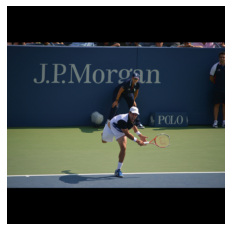

Person: tensor(True)
Tennis Racket: 0.9998477431207217


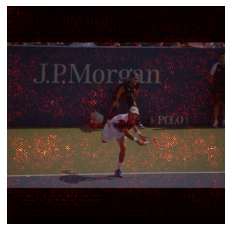

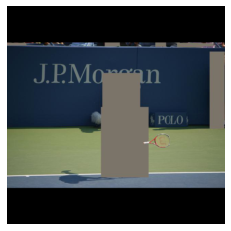

Person: tensor(False)
Tennis Racket: 0.4660637351822792


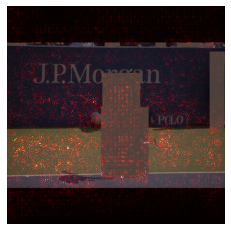

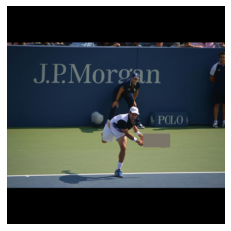

Person: tensor(True)
Tennis Racket: 0.9999141601006225


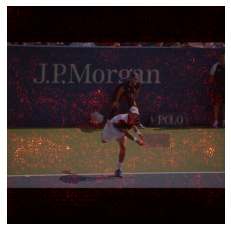

In [2]:
# The class id of Tennis Racket is 43

urls = ['/home/gregory/Datasets/COCO/val2017/000000000885.jpg',
        '/home/gregory/Datasets/COCO-full/val/tennis+racket-person/both-spurious/box/000000000885.jpg',
        '/home/gregory/Datasets/COCO-full/val/tennis+racket-person/both-main/box/000000000885.jpg']

for url in urls:
    #im = Image.open(requests.get(url, stream=True).raw).convert('RGB')
    im = Image.open(url).convert('RGB')

    x = t(im).unsqueeze(0)
    x.requires_grad = True

    y_hat = model(x)

    y_hat[0][43].backward() # Get gradient of model's predition for Tie

    saliency, _ = torch.max(x.grad.data.abs(),dim=1)

    im_reshaped = torch2PIL(x)

    plt.imshow(im_reshaped)
    plt.axis('off')
    plt.show()
    plt.close()
    print('Person:', y_hat[0][1] > 0)
    print('Tennis Racket:', sigmoid(y_hat[0][43].data.numpy()))
    plt.imshow(im_reshaped)
    plt.imshow(saliency[0], cmap=plt.cm.hot, alpha = 0.45)
    plt.axis('off')
    plt.show()
    plt.close()
    print()
    print()

